类别比例
 0    50
1    50
dtype: int64
类别比例
 0    50
1    10
dtype: int64
(0, 0)
(0, 1)


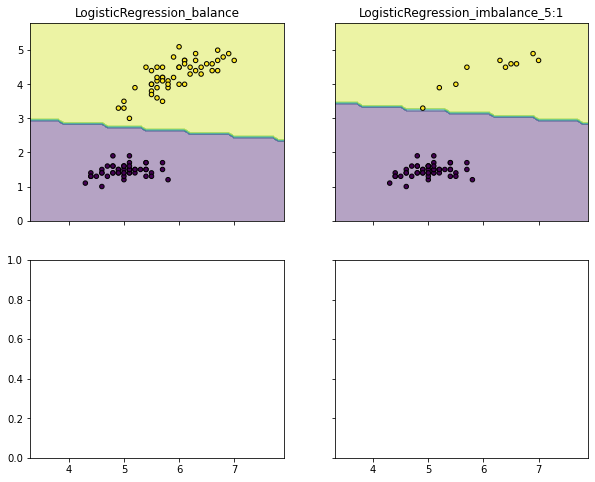

In [60]:
### 样本不均衡的影响


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import  datasets
from itertools import product
from sklearn.linear_model import LogisticRegression

# 只要加载iris二分类的数据
iris = datasets.load_iris()
X1 = iris.data[0:100, [0, 2]]
y1 = iris.target[0:100]
print('类别比例\n',pd.Series(y1).value_counts())

X2 = iris.data[0:60, [0, 2]]
y2 = iris.target[0:60]
print('类别比例\n',pd.Series(y2).value_counts())

# Training classifiers
clf1 = LogisticRegression()  
clf2 = LogisticRegression()  
# clf2 = LogisticRegression(class_weight={0:1,1:5})  # 代价敏感学习





clf1.fit(X1, y1)
clf2.fit(X2, y2)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt,X,y in zip([(0, 0),(0, 1)],
                        [clf1, clf2],
                        ['LogisticRegression_balance', 'LogisticRegression_imbalance_5:1'],
                         [X1,X2],
                         [y1,y2]):
    print(idx)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

(0, 0)
(0, 1)
(1, 0)
(1, 1)


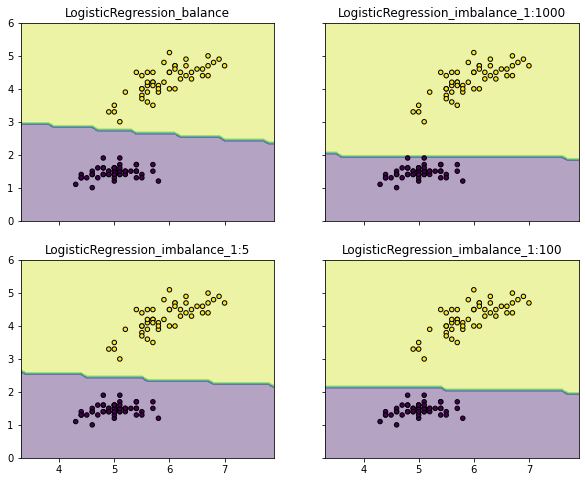

In [30]:
## 代价不均衡的影响


import numpy as np
import matplotlib.pyplot as plt
from sklearn import  datasets
from itertools import product
from sklearn.linear_model import LogisticRegression


# 只加载iris二分类的数据
iris = datasets.load_iris()
X = iris.data[0:100, [0, 2]]
y = iris.target[0:100]


# Training classifiers
clf1 = LogisticRegression()
clf2 = LogisticRegression(class_weight={0:1,1:1000})
clf3 = LogisticRegression(class_weight={0:1,1:5})
clf4 = LogisticRegression(class_weight={0:1,1:100})



clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['LogisticRegression_balance', 'LogisticRegression_imbalance_1:1000',
                         'LogisticRegression_imbalance_1:5', 'LogisticRegression_imbalance_1:100']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()